# Metin Sınıflandırma

In [2]:
import pandas as pd
import on_islem

In [3]:
df = pd.read_csv("data/metin_siniflandirma.csv")

In [4]:
df["Text_2"] = df['Text'].apply(on_islem.pre_processing)
df["Text_2"] = df['Text_2'].apply(on_islem.remove_space)
df["Text_3"] = [' '.join(w for w in item) for item in df["Text_2"]]

df_index = df [df ["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df ["index"]
df.head()

,Unnamed: 0,Text,Label,Text_2,Text_3
0,0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal mı oğl k...
2,2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal
3,3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, bu, yıl, çıkar, bu, boku,...",black friday amk bu yıl çıkar bu boku mal mı n...
4,4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [5]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size = 0.2,random_state=42)

In [8]:
len(msg_train)

3198

In [9]:
df_test = pd.DataFrame({"text":msg_test,'label':label_test})
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
svm = Pipeline([('vect',TfidfVectorizer()),('svm',LinearSVC())])

In [12]:
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test)


In [13]:
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [14]:
print("svm accuracy score : ", accuracy_score(label_test, y_pred_class))

svm accuracy score :  0.97875


In [15]:
print("svm f1 score : ", f1_score(label_test, y_pred_class, average="weighted"))

svm f1 score :  0.9787545102944623


In [16]:
!pip install matplotlib

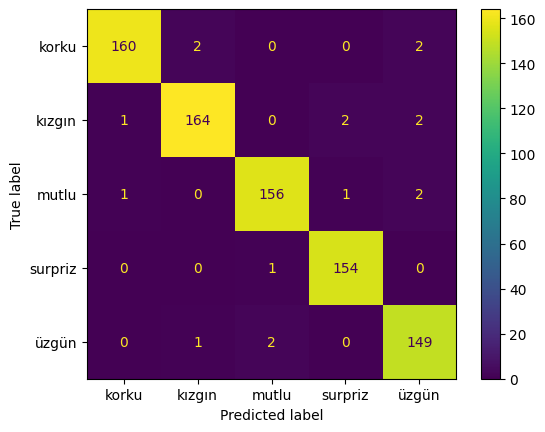

In [17]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [18]:
#df["word2vec"] = df["Text_2"].apply(on_islem.word2vec)
#df

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec.load("data/word2vec.model")
model.build_vocab(df["Text_2"].tolist(),update = True)
model.save("data/word2vec.model")

In [20]:
df["word2vec"] = df["Text_2"].apply(on_islem.word2vec)
df.head()

,Unnamed: 0,Text,Label,Text_2,Text_3,word2vec
0,0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.001567357569001615, 0.007259270176291466, ..."
1,1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal mı oğl k...,"[-0.00024124815536197275, 0.004122820217162371..."
2,2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal,"[0.0013769634533673525, 0.009355192072689533, ..."
3,3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, bu, yıl, çıkar, bu, boku,...",black friday amk bu yıl çıkar bu boku mal mı n...,"[-0.007983852177858353, 0.02185973897576332, 0..."
4,4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.003678110660985112, 0.01160567905753851, 0..."


In [21]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size = 0.2,random_state=42)
svm = Pipeline([('svm',LinearSVC())])
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test)
print("svm accuracy score : ", accuracy_score(label_test, y_pred_class))
print("svm f1 score : ", f1_score(label_test, y_pred_class, average="weighted"))

svm accuracy score :  0.3825
svm f1 score :  0.38481459578323085


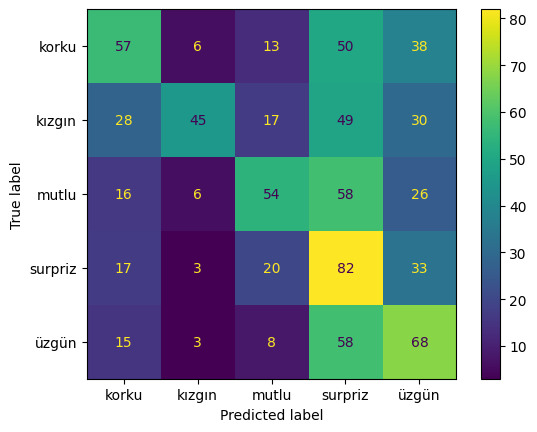

In [22]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size = 0.2,random_state=42)
knn = Pipeline([('vect',TfidfVectorizer()),('knn',KNeighborsClassifier())])
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score : ", accuracy_score(label_test, y_pred_class))
print("knn f1 score : ", f1_score(label_test, y_pred_class, average="weighted"))

knn accuracy score :  0.79
knn f1 score :  0.7900125151206546


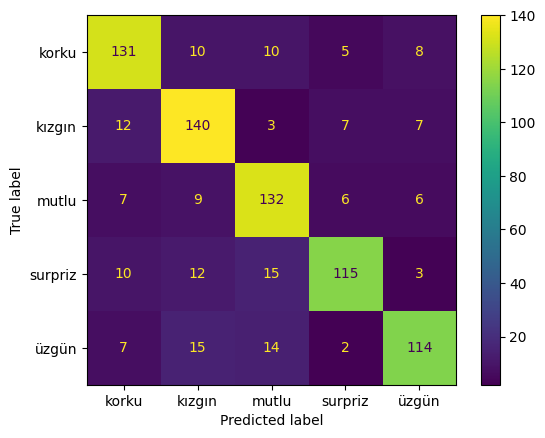

In [24]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [26]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size = 0.2,random_state=42)
knn = Pipeline([('knn',KNeighborsClassifier())])
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score : ", accuracy_score(label_test, y_pred_class))
print("knn f1 score : ", f1_score(label_test, y_pred_class, average="weighted"))

knn accuracy score :  0.3675
knn f1 score :  0.3596188616191356


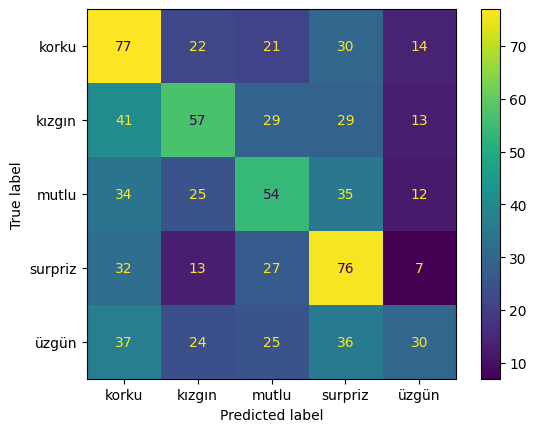

In [27]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()